In [1]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
MAX_COUNTER = 1000
from tqdm.notebook import trange, tqdm

In [2]:
rm = pyvisa.ResourceManager()
dmm =  rm.open_resource("TCPIP::192.168.1.248::INSTR")
dmm.read_termination = '\n'
dmm.write_termination = '\n'

In [3]:
idn = dmm.query('*IDN?')
print("Connected to " + idn)

Connected to TEKTRONIX,MDO3054,C012266,CF:91.1CT FV:v1.10


In [4]:
trig_ch = 2
delay_ch = 1
trig_v = 2.0
trig_v_scale = 5.0
trig_v_time_scale = 800#E-9

In [5]:
dmm.write("*rst; status:preset; *cls")
dmm.write(":HORizontal:SCAle {}E-9".format(trig_v_time_scale))
dmm.write(":SELect:CH{} 1".format(trig_ch))
dmm.write(":SELect:CH{} 1".format(delay_ch))
dmm.write("CH{}:SCAle 5".format(trig_ch))
dmm.write("CH{}:SCAle 5".format(delay_ch))
dmm.write(":TRIGger:A:TYPe EDGE")
dmm.write(":TRIGger:A:EDGE:SOUrce CH{}".format(trig_ch))
dmm.write(":TRIGger:A:EDGE:SOUrce CH{}".format(delay_ch))
dmm.write(":TRIGger:A:THReshold:CH{} {}".format(trig_ch, trig_v))
dmm.write(":TRIGger:A:THReshold:CH{} {}".format(delay_ch, trig_v))
dmm.write(":TRIGger:A:EDGE:SLOpe RISe")

27

In [6]:
dmm.write("MEASUrement:IMMed:DELay:DIRection FORWARDS")
dmm.write("MEASurement:DELay CH{},CH{}".format(trig_ch, delay_ch))
dmm.write("MEASurement:IMMed:TYPe DELay")

29

In [7]:
print(dmm.query('MEASUrement:IMMed:DELay?'))

FORWARDS;RISE;RISE


In [8]:
ls = []
for _ in trange(MAX_COUNTER):
    data = dmm.query('MEASurement:IMMed:VALue?')
    #print(data)
    ls.append(data)
    time.sleep(0.1)

  0%|          | 0/1000 [00:00<?, ?it/s]

(array([  2.,  12.,  50., 118., 133., 174., 237., 174.,  80.,  20.]),
 array([-8.260e-07, -8.252e-07, -8.244e-07, -8.236e-07, -8.228e-07,
        -8.220e-07, -8.212e-07, -8.204e-07, -8.196e-07, -8.188e-07,
        -8.180e-07]),
 <BarContainer object of 10 artists>)

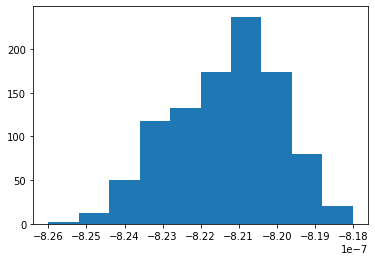

In [ ]:
data_np = np.array(ls).astype(np.double)
plt.plot(data_np)